In [42]:
import pandas as pd

In [43]:
df=pd.read_csv('H-1B_2017.csv')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (14,15,16,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
table_2 = df.loc[df['CASE_STATUS'].isin(["CERTIFIED", "DENIED", "REJECTED"])]

In [45]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554174 entries, 194 to 624649
Data columns (total 52 columns):
CASE_NUMBER                    554174 non-null object
CASE_STATUS                    554174 non-null object
CASE_SUBMITTED                 554174 non-null object
DECISION_DATE                  554174 non-null object
VISA_CLASS                     554174 non-null object
EMPLOYMENT_START_DATE          554148 non-null object
EMPLOYMENT_END_DATE            554147 non-null object
EMPLOYER_NAME                  554138 non-null object
EMPLOYER_BUSINESS_DBA          37631 non-null object
EMPLOYER_ADDRESS               554172 non-null object
EMPLOYER_CITY                  554164 non-null object
EMPLOYER_STATE                 554161 non-null object
EMPLOYER_POSTAL_CODE           554161 non-null object
EMPLOYER_COUNTRY               468194 non-null object
EMPLOYER_PROVINCE              4995 non-null object
EMPLOYER_PHONE                 468194 non-null object
EMPLOYER_PHONE_EXT        

In [46]:
table_2['EMPLOYER_NAME'] = table_2['EMPLOYER_NAME'].str.upper()
table_2['SOC_NAME'] = table_2['SOC_NAME'].str.upper()
table_2['JOB_TITLE'] = table_2['JOB_TITLE'].str.upper()
table_2['FULL_TIME_POSITION'] = table_2['FULL_TIME_POSITION'].str.upper()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [47]:
table_2 = table_2.loc[table_2['CASE_STATUS'].isin(["CERTIFIED", "DENIED"])]

In [48]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554174 entries, 194 to 624649
Data columns (total 52 columns):
CASE_NUMBER                    554174 non-null object
CASE_STATUS                    554174 non-null object
CASE_SUBMITTED                 554174 non-null object
DECISION_DATE                  554174 non-null object
VISA_CLASS                     554174 non-null object
EMPLOYMENT_START_DATE          554148 non-null object
EMPLOYMENT_END_DATE            554147 non-null object
EMPLOYER_NAME                  554138 non-null object
EMPLOYER_BUSINESS_DBA          37631 non-null object
EMPLOYER_ADDRESS               554172 non-null object
EMPLOYER_CITY                  554164 non-null object
EMPLOYER_STATE                 554161 non-null object
EMPLOYER_POSTAL_CODE           554161 non-null object
EMPLOYER_COUNTRY               468194 non-null object
EMPLOYER_PROVINCE              4995 non-null object
EMPLOYER_PHONE                 468194 non-null object
EMPLOYER_PHONE_EXT        

In [49]:
table_2.CASE_STATUS.value_counts()

CERTIFIED    545694
DENIED         8480
Name: CASE_STATUS, dtype: int64

In [50]:
table_3 = table_2.dropna(axis=0, how='any', subset = ['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 
                                                      'FULL_TIME_POSITION', 'PREVAILING_WAGE'])

In [51]:
table_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554133 entries, 194 to 624649
Data columns (total 52 columns):
CASE_NUMBER                    554133 non-null object
CASE_STATUS                    554133 non-null object
CASE_SUBMITTED                 554133 non-null object
DECISION_DATE                  554133 non-null object
VISA_CLASS                     554133 non-null object
EMPLOYMENT_START_DATE          554107 non-null object
EMPLOYMENT_END_DATE            554106 non-null object
EMPLOYER_NAME                  554133 non-null object
EMPLOYER_BUSINESS_DBA          37631 non-null object
EMPLOYER_ADDRESS               554132 non-null object
EMPLOYER_CITY                  554124 non-null object
EMPLOYER_STATE                 554121 non-null object
EMPLOYER_POSTAL_CODE           554121 non-null object
EMPLOYER_COUNTRY               468166 non-null object
EMPLOYER_PROVINCE              4995 non-null object
EMPLOYER_PHONE                 468166 non-null object
EMPLOYER_PHONE_EXT        

In [52]:
table_3.CASE_STATUS.value_counts()

CERTIFIED    545660
DENIED         8473
Name: CASE_STATUS, dtype: int64

In [53]:
table_temp_2_Dx = table_3[table_3['CASE_STATUS'] == 'DENIED']

In [54]:
table_temp_2_Cx = table_3[table_3['CASE_STATUS'] == 'CERTIFIED']

In [55]:
##basic library - Pandas and Numpy
import pandas as pd
import numpy as np

## Imports for Data Consistency - String Match
import difflib as dff

## Imports for different type of classfiers
from sklearn import tree # <- Decision- Trees
from sklearn import svm # <- Support Vector Machines
import sklearn.linear_model as linear_model # <- Logisitic Regression - Sigmoid Function on the Linear Regression
from sklearn.ensemble import RandomForestClassifier # <- Random Forest Classifier
from sklearn.neural_network import MLPClassifier # <- Neural Networks
from sklearn.naive_bayes import GaussianNB # <- Gaussian Naive-Bayes Classifier

## Imports for recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

## Imports for splitting the data into training and test data
from sklearn.model_selection import train_test_split

## Imports for evaluating the different classifier models selected
import sklearn.metrics as metrics
from sklearn import preprocessing

In [56]:
Input_Certified, Input_Certified_extra, y_certified, y_certified_extra = train_test_split(table_3[table_3.CASE_STATUS == 'CERTIFIED'],\
                                                                                          table_temp_2_Cx.CASE_STATUS, train_size= 0.06, random_state=1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [57]:
## Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
training_dataframe = Input_Certified.append(table_temp_2_Dx)

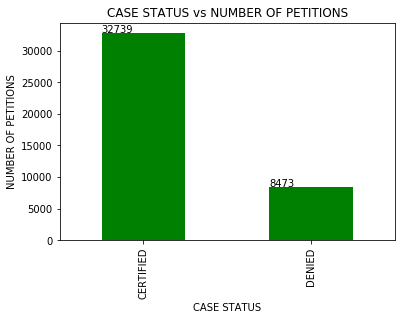

In [59]:
plot_after_ds = training_dataframe['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'green')
plot_after_ds.set_xlabel("CASE STATUS")
plot_after_ds.set_ylabel("NUMBER OF PETITIONS")
for p in plot_after_ds.patches:
    plot_after_ds.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plt.show()

In [60]:
def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"

In [61]:
def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA"
    elif ratio_of_acceptance>=0.80:
        return "VHA"

In [62]:
df.head().T

,0,1,2,3,4
CASE_NUMBER,I-200-16055-173457,I-200-16064-557834,I-200-16063-996093,I-200-16272-196340,I-200-15053-636744
CASE_STATUS,CERTIFIED-WITHDRAWN,CERTIFIED-WITHDRAWN,CERTIFIED-WITHDRAWN,WITHDRAWN,CERTIFIED-WITHDRAWN
CASE_SUBMITTED,02/24/2016,03/04/2016,03/10/2016,09/28/2016,02/22/2015
DECISION_DATE,10/01/2016,10/01/2016,10/01/2016,10/01/2016,10/02/2016
VISA_CLASS,H-1B,H-1B,H-1B,H-1B,H-1B
EMPLOYMENT_START_DATE,08/10/2016,08/16/2016,09/09/2016,01/26/2017,03/01/2015
EMPLOYMENT_END_DATE,08/10/2019,08/16/2019,09/09/2019,01/25/2020,03/01/2018
EMPLOYER_NAME,DISCOVER PRODUCTS INC.,DFS SERVICES LLC,EASTBANC TECHNOLOGIES LLC,INFO SERVICES LLC,BB&T CORPORATION
EMPLOYER_BUSINESS_DBA,NaN,NaN,NaN,NaN,NaN
EMPLOYER_ADDRESS,2500 LAKE COOK ROAD,2500 LAKE COOK ROAD,1211 31ST ST. NW,17177 NORTH LAUREL PARK DR,223 WEST NASH STREET


In [63]:
training_dataframe['WAGE_CATEGORY'] = training_dataframe['PREVAILING_WAGE'].apply(wage_categorization)

In [64]:


training_dataframe_1 = training_dataframe.loc[:,['EMPLOYER_NAME', 'CASE_STATUS']]
training_dataframe_1s = training_dataframe.loc[:,['SOC_NAME', 'CASE_STATUS']]
training_dataframe_1j = training_dataframe.loc[:,['JOB_TITLE', 'CASE_STATUS']]



In [65]:


training_dataframe_2_C = training_dataframe_1[training_dataframe_1.CASE_STATUS == 'CERTIFIED'].EMPLOYER_NAME
training_dataframe_2_Cs = training_dataframe_1s[training_dataframe_1s.CASE_STATUS == 'CERTIFIED'].SOC_NAME
training_dataframe_2_Cj = training_dataframe_1j[training_dataframe_1j.CASE_STATUS == 'CERTIFIED'].JOB_TITLE
positive_counts = training_dataframe_2_C.value_counts()
positive_counts_s = training_dataframe_2_Cs.value_counts()
positive_counts_j = training_dataframe_2_Cj.value_counts()



In [66]:
total_counts = training_dataframe_1.EMPLOYER_NAME.value_counts()
total_counts_s = training_dataframe_1s.SOC_NAME.value_counts()
total_counts_j = training_dataframe_1j.JOB_TITLE.value_counts()

In [67]:
final_ratio_series = positive_counts / total_counts

final_ratio_series.fillna(-1, inplace=True)
final_classification_employer = final_ratio_series.apply(categorisation_visagrant)
training_dataframe['EMPLOYER_ACCEPTANCE'] = training_dataframe.EMPLOYER_NAME.map(final_classification_employer)


In [68]:
final_ratio_series_s = positive_counts_s / total_counts_s
final_ratio_series_s.fillna(-1, inplace=True)
final_classification_soc = final_ratio_series_s.apply(categorisation_visagrant)
training_dataframe['SOC_ACCEPTANCE'] = training_dataframe.SOC_NAME.map(final_classification_soc)

In [69]:
final_ratio_series_j = positive_counts_j / total_counts_j
final_ratio_series_j.fillna(-1, inplace=True)
final_classification_job = final_ratio_series_j.apply(categorisation_visagrant)
training_dataframe['JOB_ACCEPTANCE'] = training_dataframe.JOB_TITLE.map(final_classification_job)


In [70]:


print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_ACCEPTANCE.nunique())
print("Wages Category", training_dataframe.WAGE_CATEGORY.nunique())
print("Unique SOCs ", training_dataframe.SOC_ACCEPTANCE.nunique())
print("Unique Job Titles ",training_dataframe.JOB_ACCEPTANCE.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE_STATE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())



Case Status  2
Unique Employers  6
Wages Category 5
Unique SOCs  6
Unique Job Titles  6
Unique Worksite State  55
Unique Employment Type  2


In [71]:
training_dataframe.head().T

,546692,342835,376890,576226,607791
CASE_NUMBER,I-200-17200-867830,I-200-17076-222759,I-200-17080-050125,I-200-17224-813914,I-200-17254-021948
CASE_STATUS,CERTIFIED,CERTIFIED,CERTIFIED,CERTIFIED,CERTIFIED
CASE_SUBMITTED,07/19/2017,03/17/2017,03/21/2017,08/12/2017,09/11/2017
DECISION_DATE,07/25/2017,03/23/2017,03/27/2017,08/17/2017,09/15/2017
VISA_CLASS,H-1B,H-1B,H-1B,H-1B,H-1B
EMPLOYMENT_START_DATE,01/15/2018,09/01/2017,09/20/2017,08/14/2017,01/04/2018
EMPLOYMENT_END_DATE,01/14/2021,08/31/2020,09/19/2020,09/11/2019,01/03/2021
EMPLOYER_NAME,"FREYR, INC.",TECH MATRIX INC,"AM ARCHITECTURAL METAL & GLASS, INC.","SEERTEK SYSTEMS, INC",KPIT INFOSYSTEMS INCORPORATED
EMPLOYER_BUSINESS_DBA,NaN,NaN,NaN,NaN,NaN
EMPLOYER_ADDRESS,150 COLLEGE ROAD WEST,"622 GEORGES ROAD,",5 BRIDGE STREET,200 CENTENNIAL AVENUE,379 THORNALL STREET


In [72]:
dict_cs = {"CERTIFIED" : 1, "DENIED": 0}
dict_fp = {"Y" : 1, "N" : 0}
try:
    
    training_dataframe['CASE_STATUS'] = training_dataframe['CASE_STATUS'].apply(lambda x: dict_cs[x])
    training_dataframe['FULL_TIME_POSITION'] = training_dataframe['FULL_TIME_POSITION'].apply(lambda x: dict_fp[x])
except:
    pass

In [73]:
training_dataframe.sort_index(inplace = True)
training_dataframe = training_dataframe.loc[:, ['CASE_STATUS',\
                                                'WORKSITE_STATE', 'WAGE_CATEGORY',  'EMPLOYER_ACCEPTANCE', 'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE', 'FULL_TIME_POSITION']]
training_dataframe.head()

,CASE_STATUS,WORKSITE_STATE,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,JOB_ACCEPTANCE,SOC_ACCEPTANCE,FULL_TIME_POSITION
237,1,CA,HIGH,VHA,VHA,VHA,1
269,1,CA,MEDIUM,VHA,VHA,VHA,1
274,1,TX,MEDIUM,VHA,VHA,VHA,1
322,1,TN,HIGH,HA,VHA,VHA,1
324,1,DC,LOW,VHA,VHA,HA,1


In [75]:
final_df_train = pd.get_dummies(training_dataframe, columns=['WORKSITE_STATE', 'FULL_TIME_POSITION', 'WAGE_CATEGORY', 'EMPLOYER_ACCEPTANCE',
                                                             
                                                                'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE' ], drop_first=True)
final_df_train.head()

,CASE_STATUS,WORKSITE_STATE_AL,WORKSITE_STATE_AR,WORKSITE_STATE_AZ,WORKSITE_STATE_CA,WORKSITE_STATE_CO,WORKSITE_STATE_CT,WORKSITE_STATE_DC,WORKSITE_STATE_DE,WORKSITE_STATE_FL,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
237,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
269,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
274,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
322,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
324,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(final_df_train.iloc[:,1:], final_df_train.iloc[:, 0], test_size = 0.20, random_state=1)
#y_train[y_train==1].shape
y_test[y_test==1].shape

(6528,)

In [81]:
y_test[y_test==0].shape

(1715,)

In [79]:


rf = RandomForestClassifier(n_estimators = 500, random_state = 50)
# Train the model on training data
rf.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

In [80]:
y_pred_rf =  rf.predict(X_test)
probs = rf.predict_proba(X_test)
print(metrics.confusion_matrix(y_test,y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))

[[1277  438]
 [ 148 6380]]
             precision    recall  f1-score   support

          0       0.90      0.74      0.81      1715
          1       0.94      0.98      0.96      6528

avg / total       0.93      0.93      0.93      8243



In [82]:
import sklearn.metrics as skm
skm.roc_auc_score(y_test,probs[:, 1])

0.93694071378551413

In [84]:
import pandas as pd
pd.crosstab(y_test, rf.predict(X_test), rownames=['true'], colnames=['predict'])

predict,0,1
true,,
0,1277,438
1,148,6380


In [85]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(v_probs, y_test, title, xlabel, ylabel):
    # ROC
    tpr, fpr, thresholds = roc_curve(v_probs, y_test)

    plt.hold(True)
    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, color='red')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()
    

In [87]:
v_probs = rf.predict_proba(X_test)

In [91]:
v_probs.shape

(8243, 2)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


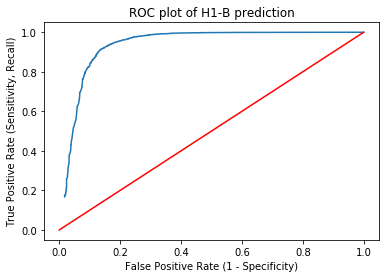

In [94]:
plot_roc(probs[:, 1], y_test, "ROC plot of H1-B prediction", "False Positive Rate (1 - Specificity)", "True Positive Rate (Sensitivity, Recall)")